###Train in GPU for better performance

#Import Libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
#Split the data into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def show(idx):
    print(y_train[idx])
    plt.imshow(x_train[idx])

4


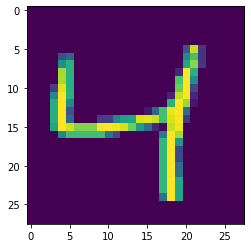

In [7]:
show(2)

#Preprocess data

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##Normalization

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#Creating the model

In [11]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

#Training the model

In [13]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 [==============================] - 38s 18ms/step - loss: 0.4202 - accuracy: 0.8665 - val_loss: 0.0491 - val_accuracy: 0.9839
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0291 - val_accuracy: 0.9898
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0282 - val_accuracy: 0.9909
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0260 - val_accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0227 - accuracy: 0.9917 - val_loss: 0.0291 - val_accuracy: 0.991

#Evaluate the model

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030825616791844368
Test accuracy: 0.9919000267982483


###Saving the model

In [15]:
model.save('mnist.h5')